import required libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from xgboost import XGBClassifier

load the data

In [3]:
data=pd.read_csv("./PCOS_data.csv")

In [4]:
data

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.000,19.3,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,2.16,36,30,0.83,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.500,24.9,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,6.17,38,32,0.84,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.000,25.3,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,6.30,40,36,0.90,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.000,29.7,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,3.42,42,36,0.86,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.000,20.1,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,4.42,37,30,0.81,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.5,17,72,16,11.00,2,5,8.0,0,1,1.99,1.99,10.06,1.81,5.56,28,26,0.93,1.11,1.7,5.30,36.6,0.25,92.0,0,0,0,0,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,538,0,30,63.2,158.000,25.3,15,72,18,10.80,2,5,4.0,1,1,80.13,1.99,5.07,2.84,1.79,34,32,0.94,2.05,5.6,21.09,23.0,0.25,108.0,1,0,0,0,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,539,0,36,54.0,152.000,23.4,13,74,20,10.80,2,6,8.0,0,0,1.99,1.99,11.96,2.78,4.30,30,28,0.93,2.87,3.7,96.41,22.5,0.25,92.0,0,0,0,0,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,540,0,27,50.0,150.000,22.2,15,74,20,12.00,4,2,2.0,0,0,292.92,1.99,4.40,4.33,1.02,28,26,0.93,2.50,5.2,38.89,22.4,0.25,115.0,0,0,0,0,1,0.0,0,110,70,7,6,18.0,16.0,11.5


### Exploratory Data Analysis

In [5]:
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,2.16,36,30,0.83,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.9,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,6.17,38,32,0.84,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.3,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,6.30,40,36,0.90,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.7,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,3.42,42,36,0.86,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.1,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,4.42,37,30,0.81,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [6]:
data.tail()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
536,537,537,0,35,50.0,164.592,18.5,17,72,16,11.0,2,5,8.0,0,1,1.99,1.99,10.06,1.81,5.56,28,26,0.93,1.11,1.7,5.30,36.6,0.25,92.0,0,0,0,0,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,538,0,30,63.2,158.000,25.3,15,72,18,10.8,2,5,4.0,1,1,80.13,1.99,5.07,2.84,1.79,34,32,0.94,2.05,5.6,21.09,23.0,0.25,108.0,1,0,0,0,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,539,0,36,54.0,152.000,23.4,13,74,20,10.8,2,6,8.0,0,0,1.99,1.99,11.96,2.78,4.30,30,28,0.93,2.87,3.7,96.41,22.5,0.25,92.0,0,0,0,0,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,540,0,27,50.0,150.000,22.2,15,74,20,12.0,4,2,2.0,0,0,292.92,1.99,4.40,4.33,1.02,28,26,0.93,2.50,5.2,38.89,22.4,0.25,115.0,0,0,0,0,1,0.0,0,110,70,7,6,18.0,16.0,11.5
540,541,541,1,23,82.0,165.000,30.1,13,80,20,10.2,4,7,2.0,0,0,1.99,1.99,3.99,4.30,0.93,48,46,0.96,1.66,20,20.74,17.4,0.37,108.0,1,1,1,1,1,1.0,0,120,70,9,10,19.0,18.0,6.9


In [7]:
data.iloc[0]

Sl. No                        1
Patient File No.              1
PCOS (Y/N)                    0
 Age (yrs)                   28
Weight (Kg)                44.6
Height(Cm)                152.0
BMI                        19.3
Blood Group                  15
Pulse rate(bpm)              78
RR (breaths/min)             22
Hb(g/dl)                  10.48
Cycle(R/I)                    2
Cycle length(days)            5
Marraige Status (Yrs)       7.0
Pregnant(Y/N)                 0
No. of abortions              0
  I   beta-HCG(mIU/mL)     1.99
II    beta-HCG(mIU/mL)     1.99
FSH(mIU/mL)                7.95
LH(mIU/mL)                 3.68
FSH/LH                     2.16
Hip(inch)                    36
Waist(inch)                  30
Waist:Hip Ratio            0.83
TSH (mIU/L)                0.68
AMH(ng/mL)                 2.07
PRL(ng/mL)                45.16
Vit D3 (ng/mL)             17.1
PRG(ng/mL)                 0.57
RBS(mg/dl)                 92.0
Weight gain(Y/N)              0
hair gro

In [8]:
data['PCOS (Y/N)'].value_counts()

PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64

In [9]:
data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.00000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.307579,13.802218,73.247689,19.243993,11.160037,2.560074,4.94085,7.680926,0.380776,0.288355,664.549235,14.601832,6.469919,6.904917,37.992606,33.841035,0.891627,2.981281,24.321497,49.915874,0.610945,99.835860,0.377079,0.273567,0.306839,0.452865,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.055129,1.840812,4.430285,1.688629,0.866904,0.901950,1.49202,4.803835,0.486027,0.692575,3348.920576,217.022081,86.673255,60.691982,3.967920,3.596894,0.046135,3.755532,14.970391,346.206599,3.808853,18.559298,0.485104,0.446202,0.461609,0.498234,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,8.500000,2.000000,0.00000,0.000000,0.000000,0.000000,1.300000,0.210000,0.020000,0.000000,26.000000,24.000000,0.760000,0.040000,0.400000,0.000000,0.047000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,10.500000,2.000000,4.00000,4.000000,0.000000,0.000000,1.990000,3.300000,1.020000,1.420000,36.000000,32.000000,0.860000,1.480000,14.520000,20.800000,0.250000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,11.000000,2.000000,5.00000,7.000000,0.000000,0.000000,20.000000,4.850000,2.300000,2.170000,38.000000,34.000000,0.890000,2.260000,21.920000,25.900000,0.320000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.600000,15.000000,74.000000,20.000000,11.700000,4.000000,5.00000,10.000000,1.000000,0.000000,297.210000,6.410000,3.680000,3.960000,40.000000,36.000000,0.930000,3.570000,29.890000,34.500000,0.450000,107.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,12.00000,30.000000,1.000000,5.000000,32460.970000,5052.000000,2018.000000,1372.830000,48.000000,47.000000,0.980000,65.000000,128.240000,6014.660000,85.000000,350.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


checking for NULL values

In [10]:
data.isnull().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [11]:
data.isnull().sum().sum()

2

In [12]:
data.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [14]:
data['AMH(ng/mL)']

0      2.07
1      1.53
2      6.63
3      1.22
4      2.26
       ... 
536     1.7
537     5.6
538     3.7
539     5.2
540      20
Name: AMH(ng/mL), Length: 541, dtype: object

In [15]:
data['II    beta-HCG(mIU/mL)']

0        1.99
1        1.99
2      494.08
3        1.99
4      801.45
        ...  
536      1.99
537      1.99
538      1.99
539      1.99
540      1.99
Name: II    beta-HCG(mIU/mL), Length: 541, dtype: object

In [16]:
data=data.drop('AMH(ng/mL)',axis=1)

In [17]:
data=data.drop('II    beta-HCG(mIU/mL)',axis=1)

In [18]:
data

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.000,19.3,15,78,22,10.48,2,5,7.0,0,0,1.99,7.95,3.68,2.16,36,30,0.83,0.68,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.500,24.9,15,74,20,11.70,2,5,11.0,1,0,60.80,6.73,1.09,6.17,38,32,0.84,3.16,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.000,25.3,11,72,18,11.80,2,5,10.0,1,0,494.08,5.54,0.88,6.30,40,36,0.90,2.54,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.000,29.7,13,72,20,12.00,2,5,4.0,0,0,1.99,8.06,2.36,3.42,42,36,0.86,16.41,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.000,20.1,11,72,18,10.00,2,5,1.0,1,0,801.45,3.98,0.90,4.42,37,30,0.81,3.57,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.5,17,72,16,11.00,2,5,8.0,0,1,1.99,10.06,1.81,5.56,28,26,0.93,1.11,5.30,36.6,0.25,92.0,0,0,0,0,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,538,0,30,63.2,158.000,25.3,15,72,18,10.80,2,5,4.0,1,1,80.13,5.07,2.84,1.79,34,32,0.94,2.05,21.09,23.0,0.25,108.0,1,0,0,0,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,539,0,36,54.0,152.000,23.4,13,74,20,10.80,2,6,8.0,0,0,1.99,11.96,2.78,4.30,30,28,0.93,2.87,96.41,22.5,0.25,92.0,0,0,0,0,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,540,0,27,50.0,150.000,22.2,15,74,20,12.00,4,2,2.0,0,0,292.92,4.40,4.33,1.02,28,26,0.93,2.50,38.89,22.4,0.25,115.0,0,0,0,0,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [19]:
data=data.drop('Sl. No',axis=1)

In [20]:
data=data.drop('Patient File No.',axis=1)

In [21]:
data

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.000,19.3,15,78,22,10.48,2,5,7.0,0,0,1.99,7.95,3.68,2.16,36,30,0.83,0.68,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,24.9,15,74,20,11.70,2,5,11.0,1,0,60.80,6.73,1.09,6.17,38,32,0.84,3.16,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,25.3,11,72,18,11.80,2,5,10.0,1,0,494.08,5.54,0.88,6.30,40,36,0.90,2.54,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,29.7,13,72,20,12.00,2,5,4.0,0,0,1.99,8.06,2.36,3.42,42,36,0.86,16.41,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,20.1,11,72,18,10.00,2,5,1.0,1,0,801.45,3.98,0.90,4.42,37,30,0.81,3.57,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,18.5,17,72,16,11.00,2,5,8.0,0,1,1.99,10.06,1.81,5.56,28,26,0.93,1.11,5.30,36.6,0.25,92.0,0,0,0,0,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,0,30,63.2,158.000,25.3,15,72,18,10.80,2,5,4.0,1,1,80.13,5.07,2.84,1.79,34,32,0.94,2.05,21.09,23.0,0.25,108.0,1,0,0,0,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,0,36,54.0,152.000,23.4,13,74,20,10.80,2,6,8.0,0,0,1.99,11.96,2.78,4.30,30,28,0.93,2.87,96.41,22.5,0.25,92.0,0,0,0,0,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,0,27,50.0,150.000,22.2,15,74,20,12.00,4,2,2.0,0,0,292.92,4.40,4.33,1.02,28,26,0.93,2.50,38.89,22.4,0.25,115.0,0,0,0,0,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [22]:
data.corr()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
PCOS (Y/N),1.000000,-0.168513,0.211938,0.068254,0.199697,0.036433,0.091821,0.036928,0.087170,0.401644,-0.178480,-0.112897,-0.027565,-0.057158,-0.027617,-0.030319,0.063879,-0.018334,0.162297,0.164598,0.012145,-0.010140,0.005143,0.085494,-0.043834,0.048922,0.441047,0.464667,0.475733,0.172879,0.286077,0.377933,0.065337,0.007942,0.038032,0.603346,0.648327,0.132992,0.097690,0.106648
Age (yrs),-0.168513,1.000000,-0.029734,-0.119819,0.021372,-0.010954,0.045831,0.087382,-0.021558,-0.085943,0.055918,0.662080,-0.044165,0.220794,0.008148,-0.017794,0.000467,0.012462,-0.002784,0.035779,0.066029,0.016740,-0.048757,0.004388,-0.021909,0.097008,-0.028826,-0.073434,-0.103421,-0.082784,-0.032921,-0.037694,-0.025911,0.073587,0.066788,-0.110793,-0.159395,-0.016352,-0.079250,-0.104238
Weight (Kg),0.211938,-0.029734,1.000000,0.420098,0.901688,0.072682,0.019983,0.043614,0.009594,0.200758,-0.002308,0.043816,-0.051048,0.093540,0.015994,-0.025750,-0.029864,-0.004843,0.633983,0.639635,0.014469,0.068482,-0.049007,0.008164,0.069731,0.114277,0.419333,0.188240,0.180186,0.074381,0.063983,0.162015,-0.068236,0.027608,0.131402,0.173751,0.124290,-0.021368,-0.073207,-0.010100
Height(Cm),0.068254,-0.119819,0.420098,1.000000,-0.006845,0.040825,-0.074339,-0.029459,0.024378,-0.017336,0.009536,-0.066747,0.046365,-0.025648,0.062301,0.030941,-0.045498,0.022021,0.216173,0.209553,-0.014199,0.013504,-0.016096,-0.034934,0.049741,0.050399,0.018534,0.048910,0.074731,-0.013533,0.061129,0.032418,0.012943,-0.067959,0.011116,0.106189,0.075358,-0.026705,0.059426,-0.054035
BMI,0.199697,0.021372,0.901688,-0.006845,1.000000,0.061328,0.050507,0.061579,0.003832,0.232703,-0.006598,0.083628,-0.073816,0.109930,-0.009893,-0.040689,-0.013274,-0.012077,0.596885,0.607787,0.025848,0.071304,-0.047314,0.027015,0.050022,0.093503,0.455304,0.181744,0.158725,0.084365,0.045535,0.159296,-0.080660,0.069737,0.140062,0.143110,0.104425,-0.011736,-0.111427,0.009327
Blood Group,0.036433,-0.010954,0.072682,0.040825,0.061328,1.000000,0.047572,-0.023766,-0.001759,0.123724,-0.006290,-0.001795,-0.070906,-0.053956,-0.035303,0.028109,-0.019542,0.036276,-0.001468,0.004752,0.018405,0.017600,0.009837,0.044622,-0.031897,0.002159,0.009016,0.086287,0.023606,-0.039461,0.039029,-0.035090,0.064035,0.030898,0.054014,0.061332,0.013974,-0.035667,-0.015725,-0.015335
Pulse rate(bpm),0.091821,0.045831,0.019983,-0.074339,0.050507,0.047572,1.000000,0.303804,-0.052048,0.101006,0.006423,0.038784,0.082542,0.046087,-0.020494,-0.013088,-0.032336,-0.013098,0.062679,0.037804,-0.050357,-0.049812,0.020242,-0.001496,-0.017703,0.042004,0.050383,0.063085,0.022533,0.038018,-0.003039,0.059804,-0.038881,-0.025510,0.007623,0.040390,0.049182,-0.048356,-0.034202,-0.041241
RR (breaths/min),0.036928,0.087382,0.043614,-0.029459,0.061579,-0.023766,0.303804,1.000000,-0.040487,0.018324,0.005004,0.077910,0.078381,-0.006433,-0.085164,-0.032427,-0.031264,-0.043311,0.074340,0.038106,-0.073801,-0.008952,0.006042,-0.009042,-0.076948,0.050809,0.050245,-0.010104,-0.001194,-0.039131,0.029242,0.135479,-0.047451,0.017323,0.052631,0.069731,0.012441,-0.031051,-0.021893,-0.063930
Hb(g/dl),0.087170,-0.021558,0.009594,0.024378,0.003832,-0.001759,-0.052048,-0.040487,1.000000,0.036683,-0.051927,0.007057,-0.092991,0.060189,-0.016857,-0.047443,-0.089156,-0.039784,-0.025561,-0.001049,0.056557,-0.021848,-0.064647,0.063855,0.065651,0.024069,0.109394,0.145560,0.025100,0.087854,0.053794,0.076293,0.011643,0.

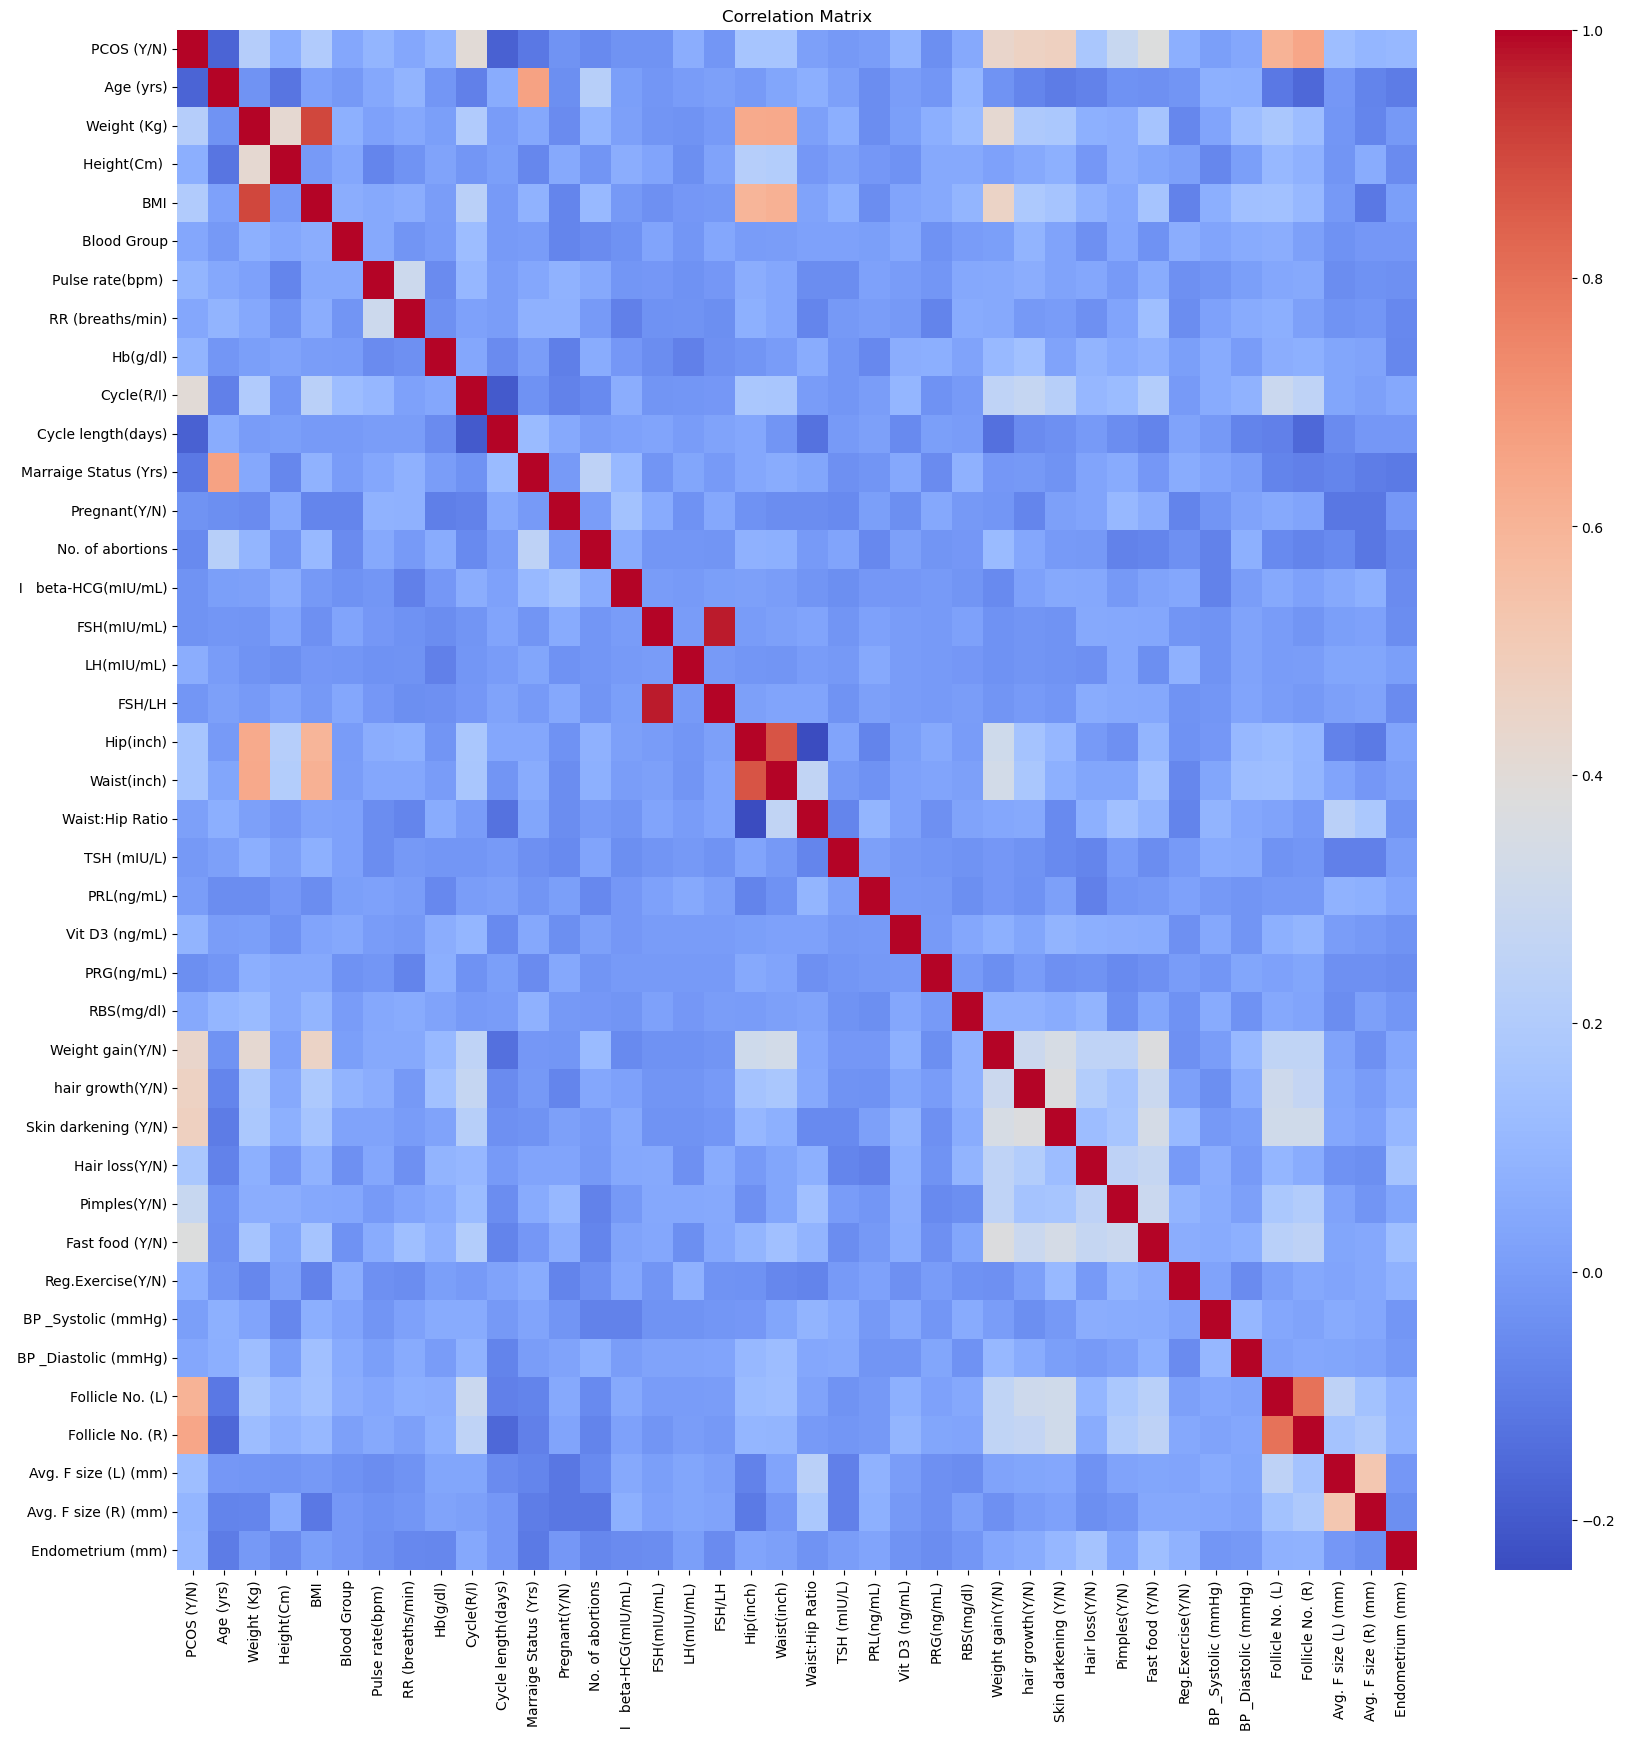

In [23]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
X=data.drop('PCOS (Y/N)',axis=1)

In [25]:
y=data['PCOS (Y/N)']

In [26]:
X

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28,44.6,152.000,19.3,15,78,22,10.48,2,5,7.0,0,0,1.99,7.95,3.68,2.16,36,30,0.83,0.68,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,36,65.0,161.500,24.9,15,74,20,11.70,2,5,11.0,1,0,60.80,6.73,1.09,6.17,38,32,0.84,3.16,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,33,68.8,165.000,25.3,11,72,18,11.80,2,5,10.0,1,0,494.08,5.54,0.88,6.30,40,36,0.90,2.54,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,37,65.0,148.000,29.7,13,72,20,12.00,2,5,4.0,0,0,1.99,8.06,2.36,3.42,42,36,0.86,16.41,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,25,52.0,161.000,20.1,11,72,18,10.00,2,5,1.0,1,0,801.45,3.98,0.90,4.42,37,30,0.81,3.57,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,35,50.0,164.592,18.5,17,72,16,11.00,2,5,8.0,0,1,1.99,10.06,1.81,5.56,28,26,0.93,1.11,5.30,36.6,0.25,92.0,0,0,0,0,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,30,63.2,158.000,25.3,15,72,18,10.80,2,5,4.0,1,1,80.13,5.07,2.84,1.79,34,32,0.94,2.05,21.09,23.0,0.25,108.0,1,0,0,0,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,36,54.0,152.000,23.4,13,74,20,10.80,2,6,8.0,0,0,1.99,11.96,2.78,4.30,30,28,0.93,2.87,96.41,22.5,0.25,92.0,0,0,0,0,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,27,50.0,150.000,22.2,15,74,20,12.00,4,2,2.0,0,0,292.92,4.40,4.33,1.02,28,26,0.93,2.50,38.89,22.4,0.25,115.0,0,0,0,0,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [27]:
y

0      0
1      0
2      1
3      0
4      0
      ..
536    0
537    0
538    0
539    0
540    1
Name: PCOS (Y/N), Length: 541, dtype: int64

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
rf_classifier=RandomForestClassifier(n_estimators=20)

In [30]:
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [31]:
rf_predict=rf_classifier.predict(X_test)

In [32]:
accuracy_score(y_test,rf_predict)

0.8440366972477065

In [33]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        77
           1       0.83      0.59      0.69        32

    accuracy                           0.84       109
   macro avg       0.84      0.77      0.79       109
weighted avg       0.84      0.84      0.84       109



In [34]:
xgboost=XGBClassifier()

In [35]:
xgboost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
predict=xgboost.predict(X_test)

In [37]:
accuracy_score(predict,y_test)

0.8623853211009175